In [1]:
import sys
from pathlib import Path
# Get the repository root (2 levels up from current notebook)
repo_root = Path(__file__).parent.parent.parent if '__file__' in globals() else Path.cwd().parent.parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df7 = pd.read_excel(data_path, sheet_name=7)


## Classification of Healthy plants vs Unhealthy plants

## SMOTE

In [3]:
# Make a new column 'Health_Status'
df = df7.copy()

# Drop the 'Planta ' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.080665,0.078947,0.076095,0.076057,0.076674,0.075621,0.071128,0.065085,...,0.043581,0.043390,0.043350,0.043182,0.043006,0.042823,0.042554,0.042378,0.042290,0.042115
1,Control,1,0.069144,0.069363,0.068419,0.070645,0.069557,0.065000,0.061534,0.059068,...,0.038174,0.037988,0.037872,0.037717,0.037651,0.037474,0.037195,0.036982,0.036745,0.036597
2,Control,1,0.076616,0.073350,0.070809,0.074157,0.075248,0.072309,0.068617,0.063023,...,0.034544,0.034326,0.034081,0.033883,0.033573,0.033437,0.033514,0.033369,0.033151,0.033020
3,Control,1,0.080048,0.078098,0.074735,0.076398,0.076766,0.073802,0.069329,0.066331,...,0.037457,0.037240,0.037009,0.036852,0.036858,0.036721,0.036493,0.036385,0.036281,0.036221
4,Control,1,0.081486,0.082473,0.079547,0.077651,0.078189,0.078181,0.072569,0.068084,...,0.035927,0.035760,0.035716,0.035555,0.035260,0.035055,0.034855,0.034737,0.034691,0.034592


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    186
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    186
0    186
Name: count, dtype: int64

Original shape: (216, 2151), Balanced shape: (372, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_20184\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.080665,0.078947,0.076095,0.076057,0.076674,0.075621,0.071128,0.065085,0.062745,...,0.043581,0.043390,0.043350,0.043182,0.043006,0.042823,0.042554,0.042378,0.042290,0.042115
1,1,0.069144,0.069363,0.068419,0.070645,0.069557,0.065000,0.061534,0.059068,0.057498,...,0.038174,0.037988,0.037872,0.037717,0.037651,0.037474,0.037195,0.036982,0.036745,0.036597
2,1,0.076616,0.073350,0.070809,0.074157,0.075248,0.072309,0.068617,0.063023,0.060506,...,0.034544,0.034326,0.034081,0.033883,0.033573,0.033437,0.033514,0.033369,0.033151,0.033020
3,1,0.080048,0.078098,0.074735,0.076398,0.076766,0.073802,0.069329,0.066331,0.064852,...,0.037457,0.037240,0.037009,0.036852,0.036858,0.036721,0.036493,0.036385,0.036281,0.036221
4,1,0.081486,0.082473,0.079547,0.077651,0.078189,0.078181,0.072569,0.068084,0.066119,...,0.035927,0.035760,0.035716,0.035555,0.035260,0.035055,0.034855,0.034737,0.034691,0.034592


In [5]:
# Add a column to distinguish between data before and after balancing
# Mark original data
n_original = len(df)
n_synthetic = len(df_balanced) - n_original

# Create status array: first n_original are 'Original', rest are 'Balanced'
data_status = ['Original'] * n_original + ['Balanced'] * n_synthetic
df_balanced.insert(0, 'Data_Status', data_status)
df_balanced.head()

C:\Users\ricar\AppData\Local\Temp\ipykernel_20184\56007382.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Data_Status', data_status)


,Data_Status,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Original,1,0.080665,0.078947,0.076095,0.076057,0.076674,0.075621,0.071128,0.065085,...,0.043581,0.043390,0.043350,0.043182,0.043006,0.042823,0.042554,0.042378,0.042290,0.042115
1,Original,1,0.069144,0.069363,0.068419,0.070645,0.069557,0.065000,0.061534,0.059068,...,0.038174,0.037988,0.037872,0.037717,0.037651,0.037474,0.037195,0.036982,0.036745,0.036597
2,Original,1,0.076616,0.073350,0.070809,0.074157,0.075248,0.072309,0.068617,0.063023,...,0.034544,0.034326,0.034081,0.033883,0.033573,0.033437,0.033514,0.033369,0.033151,0.033020
3,Original,1,0.080048,0.078098,0.074735,0.076398,0.076766,0.073802,0.069329,0.066331,...,0.037457,0.037240,0.037009,0.036852,0.036858,0.036721,0.036493,0.036385,0.036281,0.036221
4,Original,1,0.081486,0.082473,0.079547,0.077651,0.078189,0.078181,0.072569,0.068084,...,0.035927,0.035760,0.035716,0.035555,0.035260,0.035055,0.034855,0.034737,0.034691,0.034592


In [6]:
# data treatment

# Data preparation for model production
df_X = df_balanced.drop(columns=['Sana', 'Data_Status'])

X = df_X.values  
y = df_balanced['Sana'].values
data_status = df_balanced['Data_Status'].values  # Keep track of data origin

#split the data into training and testing sets
X_train, X_test, y_train, y_test, status_train, status_test = train_test_split(
    X, y, data_status, test_size=0.3, random_state=42, stratify=y
)

# Print distribution
print(f"Test set distribution:")
print(f"Original samples: {sum(status_test == 'Original')}")
print(f"Balanced samples: {sum(status_test == 'Balanced')}")

Test set distribution:
Original samples: 62
Balanced samples: 50


### Logistic Regression

In [7]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga'],
        'model__class_weight': [None, 'balanced']
    },
    # L2 regularization options
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga', 'lbfgs'],
        'model__class_weight': [None, 'balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': [None, 'balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.9910714285714286
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       1.00      0.98      0.99        56

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112



In [8]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 0.01, 'model__class_weight': None, 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}


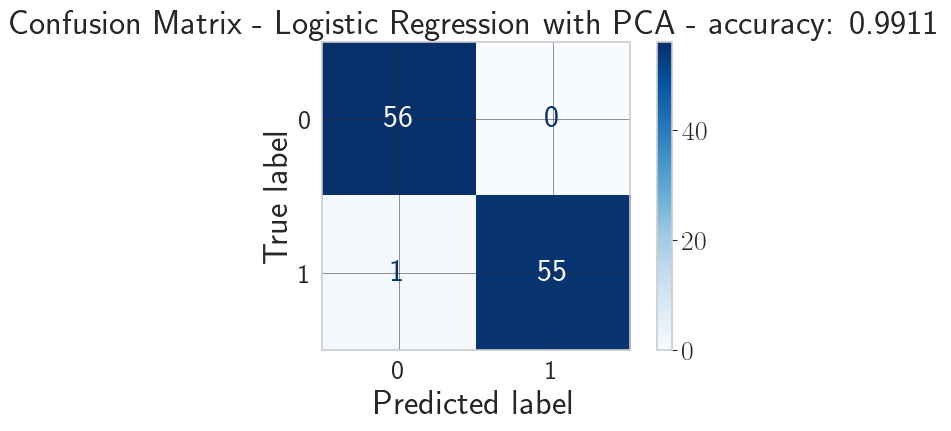

In [9]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()

c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


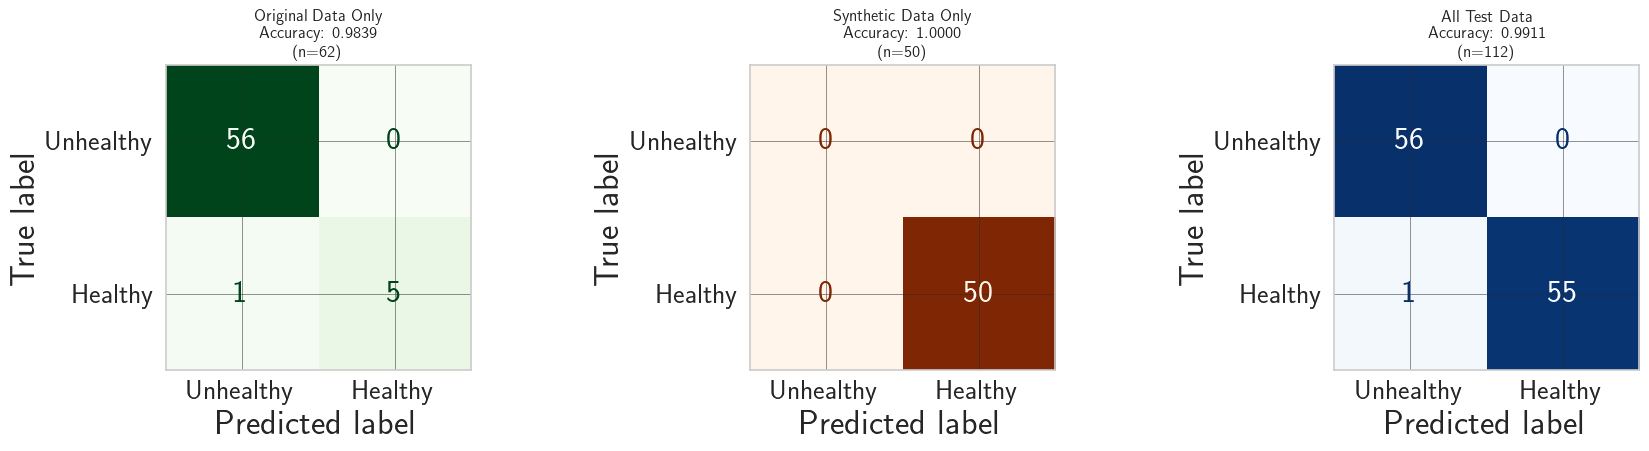

In [10]:
# Detailed analysis of predictions by data origin
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Separate predictions by data origin
original_mask = status_test == 'Original'
balanced_mask = status_test == 'Balanced'

# Calculate metrics for original data
y_test_original = y_test[original_mask]
y_pred_original = y_pred_best[original_mask]

# Calculate metrics for balanced data
y_test_balanced = y_test[balanced_mask]
y_pred_balanced = y_pred_best[balanced_mask]

# Create confusion matrices
cm_original = confusion_matrix(y_test_original, y_pred_original)
cm_balanced = confusion_matrix(y_test_balanced, y_pred_balanced)
cm_total = confusion_matrix(y_test, y_pred_best)

# Calculate accuracies
acc_original = accuracy_score(y_test_original, y_pred_original)
acc_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
acc_total = accuracy_score(y_test, y_pred_best)

# Create figure with subplots
fig = plt.figure(figsize=(18, 5))
gs = GridSpec(1, 3, figure=fig)

# Plot 1: Original data confusion matrix
ax1 = fig.add_subplot(gs[0, 0])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_original, display_labels=['Unhealthy', 'Healthy'])
disp1.plot(cmap='Greens', ax=ax1, colorbar=False)
ax1.set_title(f'Original Data Only\nAccuracy: {acc_original:.4f}\n(n={sum(original_mask)})', fontsize=12)

# Plot 2: Balanced (synthetic) data confusion matrix
ax2 = fig.add_subplot(gs[0, 1])
# Check if we have both classes in the confusion matrix
if cm_balanced.shape == (1, 1):
	# Only one class present, create a 2x2 matrix with zeros for missing class
	cm_balanced_full = np.zeros((2, 2), dtype=int)
	# Determine which class is present based on the test labels
	present_class = int(y_test_balanced[0])  # All synthetic samples are the same class
	if present_class == 1:
		cm_balanced_full[1, 1] = cm_balanced[0, 0]  # All correctly classified as class 1
	else:
		cm_balanced_full[0, 0] = cm_balanced[0, 0]  # All correctly classified as class 0
	disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_balanced_full, display_labels=['Unhealthy', 'Healthy'])
else:
	disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=['Unhealthy', 'Healthy'])
disp2.plot(cmap='Oranges', ax=ax2, colorbar=False)
ax2.set_title(f'Synthetic Data Only\nAccuracy: {acc_balanced:.4f}\n(n={sum(balanced_mask)})', fontsize=12)

# Plot 3: Total confusion matrix
ax3 = fig.add_subplot(gs[0, 2])
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_total, display_labels=['Unhealthy', 'Healthy'])
disp3.plot(cmap='Blues', ax=ax3, colorbar=False)
ax3.set_title(f'All Test Data\nAccuracy: {acc_total:.4f}\n(n={len(y_test)})', fontsize=12)

plt.tight_layout()
plt.show()

## Algorithm balancing

In [11]:
# Make a new column 'Health_Status' based on 'Tratamiento'
df_HvsUnH = df7.copy()

df_HvsUnH['Health_Status'] = df_HvsUnH['Tratamiento'].apply(lambda x: 'Healthy' if x == 'Control' else 'Unhealthy')

df_HvsUnH.head()

,Tratamiento,Planta,350,351,352,353,354,355,356,357,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,Health_Status
0,Control,1,0.080665,0.078947,0.076095,0.076057,0.076674,0.075621,0.071128,0.065085,...,0.043390,0.043350,0.043182,0.043006,0.042823,0.042554,0.042378,0.042290,0.042115,Healthy
1,Control,2,0.069144,0.069363,0.068419,0.070645,0.069557,0.065000,0.061534,0.059068,...,0.037988,0.037872,0.037717,0.037651,0.037474,0.037195,0.036982,0.036745,0.036597,Healthy
2,Control,3,0.076616,0.073350,0.070809,0.074157,0.075248,0.072309,0.068617,0.063023,...,0.034326,0.034081,0.033883,0.033573,0.033437,0.033514,0.033369,0.033151,0.033020,Healthy
3,Control,4,0.080048,0.078098,0.074735,0.076398,0.076766,0.073802,0.069329,0.066331,...,0.037240,0.037009,0.036852,0.036858,0.036721,0.036493,0.036385,0.036281,0.036221,Healthy
4,Control,5,0.081486,0.082473,0.079547,0.077651,0.078189,0.078181,0.072569,0.068084,...,0.035760,0.035716,0.035555,0.035260,0.035055,0.034855,0.034737,0.034691,0.034592,Healthy


In [12]:
# data treatment

# Data preparation for model production
df_X = df_HvsUnH.drop(columns=['Health_Status'])

X = df_X.iloc[:, 2:].values  

y = df_HvsUnH['Health_Status'].values

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
# Define a more comprehensive parameter grid for hyperparameter tuning
param_grid = [
    # L1 regularization options - only 'saga' supports class_weight with l1
    {
        'PCA__n_components': [2],
        'model__penalty': ['l1'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__class_weight': ['balanced']
    },
    # L2 regularization options - all these solvers support class_weight
    {
        'PCA__n_components': [2],
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs', 'saga'],
        'model__class_weight': ['balanced']
    },
    # Elasticnet option (saga only)
    {
        'PCA__n_components': [2],
        'model__penalty': ['elasticnet'],
        'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'model__solver': ['saga'],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__class_weight': ['balanced']
    }
]

# Create a pipeline
pipeline = Pipeline([
    ('PCA', PCA()),
    ('model', LogisticRegression(max_iter=1000))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
# Evaluate the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best Model Accuracy: 1.0
Best Model Classification Report:
               precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00         9
   Unhealthy       1.00      1.00      1.00        56

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [14]:
# Parameter for the best model found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'PCA__n_components': 2, 'model__C': 1, 'model__class_weight': 'balanced', 'model__penalty': 'l1', 'model__solver': 'saga'}


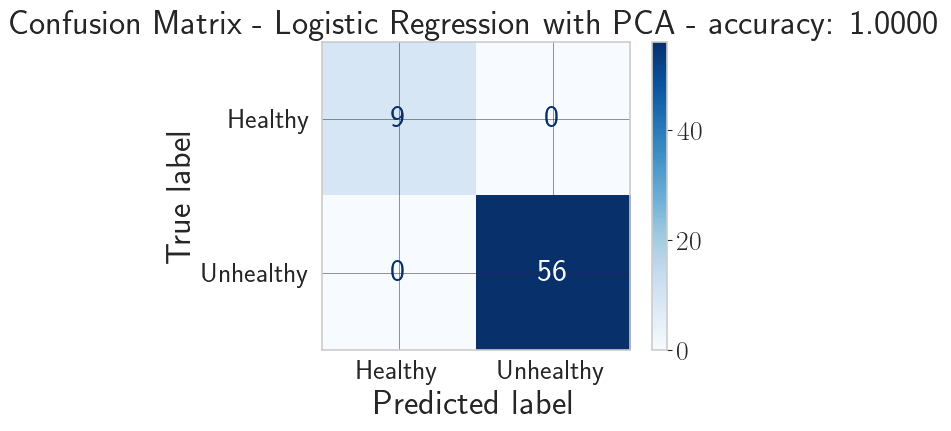

In [15]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
# Display the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression with PCA - accuracy: {accuracy_score(y_test, y_pred_best):.4f}')
plt.tight_layout()
plt.show()